<a href="https://colab.research.google.com/github/Ryoojin/Data_Visualization/blob/main/Ticketmasterdata_Hyejin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing U.S. event data from Ticketmaster_Hyejin Ryoo

In [ ]:
import io
import pandas as pd
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Events.csv to Events.csv


In [ ]:
try:
    data = pd.read_csv('Events.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('Events.csv', encoding='latin1')
    except UnicodeDecodeError:
        data = pd.read_csv('Events.csv', encoding='Windows-1252')

data.head()

<ipython-input-6-8246727b7971>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Events.csv', encoding='ISO-8859-1')


,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,...,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,G5d0Z9Vw07P-K,Fly LINQ Zipline at THE LINQ,NaN,Scream and laugh as you fly at the speed of fu...,onsale,NaN,NaN,7/2/2024,NaN,2023-10-24T17:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,2023-10-24T18:00:00Z,"HOURS OF OPERATION: Monday- Sunday, 2:00PM - 1...",NaN,7/2/2024
1,vvG1jZ9iwuTZSp,Home Free: Home Free for the Holidays Tour,NaN,NaN,onsale,2023-12-20T02:00:00Z,NaN,12/19/2023,20:00,2023-06-16T15:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,2023-06-16T16:00:00Z,NaN,NaN,NaN
2,rZ7HnEZ1AKOPaz,Crimson Love + Slugg Nutt + Affliction Lane + ...,NaN,PLEASE NOTE:No backpacks or other large bags w...,onsale,2023-12-31T02:00:00Z,NaN,12/30/2023,20:00,2023-11-10T16:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,2023-11-10T17:00:00Z,NaN,NaN,NaN
3,Z7r9jZ1A7Zy08,A Christmas Carol,NaN,NaN,onsale,2023-12-24T01:30:00Z,NaN,12/23/2023,19:30,1900-01-01T06:00:00Z,...,False,NaN,NaN,NaN,NaN,NaN,1900-01-01T07:00:00Z,NaN,NaN,NaN
4,G5diZ9iSmpo3q,'Twas the Night Before... by Cirque du Soleil,NaN,"In the best interest of fans and staff, the Ev...",onsale,2023-12-10T20:00:00Z,NaN,12/10/2023,15:00,2023-08-11T14:00:00Z,...,True,Inquiries or requests concerning accessibility...,Inquiries or requests concerning accessibility...,"To better accommodate your needs, The Theater ...",Mon - Sat: 12noon - 6:00pm. Sun & Holidays: Cl...,NaN,2023-08-11T15:00:00Z,"In the best interest of fans and staff, the Ev...",NaN,NaN


In [ ]:
#length of the data
len(data)

110236

In [ ]:
print(data.columns)

In [ ]:
print(data.dtypes)

In [ ]:
related_columns = ['MIN_PRICE', 'MAX_PRICE', 'CURRENCY', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE', 'HOT_EVENT']
related_data = data[related_columns]

# null
cleaned_data = related_data.dropna()
cleaned_data = cleaned_data[(cleaned_data['MIN_PRICE'] > 0) & (cleaned_data['MAX_PRICE'] > 0)]

print(cleaned_data)

In [ ]:
df = cleaned_data

In [ ]:
Q1 = df['MAX_PRICE'].quantile(0.25)
Q3 = df['MAX_PRICE'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['MAX_PRICE'] >= Q1 - 1.5 * IQR) & (df['MAX_PRICE'] <= Q3 + 1.5 * IQR)
df_filtered = df[filter]

In [ ]:
df_filtered['AVERAGE_PRICE'] = df_filtered[['MIN_PRICE', 'MAX_PRICE']].mean(axis=1)


grouped_data = df_filtered.groupby('CLASSIFICATION_SEGMENT')['AVERAGE_PRICE'].sum().reset_index()


fig = px.treemap(grouped_data, path=['CLASSIFICATION_SEGMENT'], values='AVERAGE_PRICE',
                 color='AVERAGE_PRICE', color_continuous_scale='Blues',
                 title='Treemap of Average Price Sum by Event Genre')


fig.show()

In [ ]:
grouped_data = df_filtered.groupby(['CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE'])['AVERAGE_PRICE'].sum().reset_index()


fig = px.treemap(grouped_data, path=['CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE'], values='AVERAGE_PRICE',
                 color='AVERAGE_PRICE', color_continuous_scale='Blues',
                 title='Treemap of Average Price Sum by Event Segment and Genre')

fig.show()


In [ ]:
df_filtered['AVERAGE_PRICE'] = df_filtered[['MIN_PRICE', 'MAX_PRICE']].mean(axis=1)

fig = px.violin(df_filtered, y="AVERAGE_PRICE", x="CLASSIFICATION_SEGMENT", color="HOT_EVENT",
                box=True, points="all", hover_data=df_filtered.columns,
                title="Interactive Violin Plot of Average Ticket Price by Event Type")

fig.show()

<ipython-input-15-a6f45f1d2f3a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
related_columns_1 = ['EVENT_NAME', 'EVENT_START_LOCAL_DATE', 'MIN_PRICE', 'MAX_PRICE', 'CURRENCY', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE', 'HOT_EVENT', 'ACCESSIBLE_SEATING_DETAIL']
related_data_1 = data[related_columns_1]

print(related_data_1)


In [ ]:
related_data_1['AVERAGE_PRICE'] = related_data_1[['MIN_PRICE', 'MAX_PRICE']].mean(axis=1)
related_data_1['ACCESSIBLE_SEATING_DETAIL'] = related_data_1['ACCESSIBLE_SEATING_DETAIL'].apply(lambda x: 0 if x else 1)
related_data_1['HOT_EVENT'] = related_data_1['HOT_EVENT'].apply(lambda x: 1 if x else 0)
print(related_data_1)

In [ ]:
Q1 = related_data_1['MAX_PRICE'].quantile(0.25)
Q3 = related_data_1['MAX_PRICE'].quantile(0.75)
IQR = Q3 - Q1
filter = (related_data_1['MAX_PRICE'] >= Q1 - 1.5 * IQR) & (related_data_1['MAX_PRICE'] <= Q3 + 1.5 * IQR)
related_data_1_filtered = related_data_1[filter]
related_data_1_filtered['AVERAGE_PRICE'] = related_data_1_filtered[['MIN_PRICE', 'MAX_PRICE']].mean(axis=1)

In [ ]:
df2 = related_data_1_filtered

In [ ]:
df2_copy = df2.copy()

df2_copy['EVENT_START_LOCAL_DATE'] = pd.to_datetime(df2_copy['EVENT_START_LOCAL_DATE'])


grouped_data = df2_copy.groupby([df2_copy['EVENT_START_LOCAL_DATE'].dt.date, 'CLASSIFICATION_SEGMENT']).agg(
    HOT_EVENT_avg=('HOT_EVENT', 'mean'),
    ACCESSIBLE_avg=('ACCESSIBLE_SEATING_DETAIL', 'mean')
).reset_index()


for genre in grouped_data['CLASSIFICATION_SEGMENT'].unique():
    fig = px.line(grouped_data[grouped_data['CLASSIFICATION_SEGMENT'] == genre],
                  x='EVENT_START_LOCAL_DATE', y=['HOT_EVENT_avg', 'ACCESSIBLE_avg'],
                  title=f'Step Line Chart for {genre}',
                  markers=True)
    fig.show()

In [ ]:
grouped = df2_copy.groupby([df2_copy['EVENT_START_LOCAL_DATE'].dt.to_period('M'), 'CLASSIFICATION_SEGMENT']).mean().reset_index()


grouped['EVENT_START_LOCAL_DATE'] = grouped['EVENT_START_LOCAL_DATE'].dt.to_timestamp()


pivot_df = grouped.pivot(index='EVENT_START_LOCAL_DATE', columns='CLASSIFICATION_SEGMENT', values='AVERAGE_PRICE').fillna(0)


data = []
for column in pivot_df.columns:
    data.append(go.Scatter(
        x=pivot_df.index, y=pivot_df[column],
        mode='lines', stackgroup='one',
        name=column
    ))


fig = go.Figure(data=data)
fig.update_layout(title='Interactive Stream Graph of Average Price by Segment Over Time',
                  xaxis_title='Date',
                  yaxis_title='Average Price')


fig.show()

<ipython-input-21-d0dd63909afa>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:

np.random.seed(0)
dates = pd.date_range('2023-09-01', '2025-10-31', freq='D')
segments = ['Music', 'Sports', 'Arts & Theatre', 'Miscellaneous']
hot_event = np.random.choice([0, 1], size=len(dates))
accessible = np.random.choice([0, 1], size=len(dates))
average_price = np.random.uniform(20, 100, size=len(dates))

df2_copy = pd.DataFrame({
    'EVENT_START_LOCAL_DATE': dates,
    'CLASSIFICATION_SEGMENT': np.random.choice(segments, size=len(dates)),
    'HOT_EVENT': hot_event,
    'ACCESSIBLE_SEATING_DETAIL': accessible,
    'AVERAGE_PRICE': average_price
})


fig = go.Figure()


for access in [0, 1]:
    for hot in [0, 1]:
        filtered_data = df2_copy[(df2_copy['ACCESSIBLE_SEATING_DETAIL'] == access) &
                                 (df2_copy['HOT_EVENT'] == hot)]
        fig.add_trace(go.Scatter(
            x=filtered_data['EVENT_START_LOCAL_DATE'],
            y=filtered_data['AVERAGE_PRICE'],
            mode='markers',
            marker=dict(
                size=filtered_data['AVERAGE_PRICE'] / 3,
                color='blue' if access else 'red',
                opacity=0.7
            ),
            name=f'{"Accessible" if access else "Not Accessible"} - {"Hot" if hot else "Not Hot"}'
        ))


buttons = [
    dict(label='All',
         method='restyle',
         args=[{'visible': [True] * 4}]),
    dict(label='Hot Events',
         method='restyle',
         args=[{'visible': [hot % 2 != 0 for hot in range(4)]}]),
    dict(label='Not Hot Events',
         method='restyle',
         args=[{'visible': [hot % 2 == 0 for hot in range(4)]}])
]

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.0, xanchor='right', y=1.2, yanchor='top')],
    title='Interactive Bubble Chart of Average Price Over Time by Event Status',
    xaxis_title='Date',
    yaxis_title='Average Price'
)

fig.show()

In [ ]:
!pip install pandas plotly altair

In [ ]:
import pandas as pd

related_data_1['EVENT_START_LOCAL_DATE'] = pd.to_datetime(related_data_1['EVENT_START_LOCAL_DATE'])

data_2024 = related_data_1[related_data_1['EVENT_START_LOCAL_DATE'].dt.year == 2024]

# Top 20 events based on count
top_20_events = data_2024.groupby('EVENT_NAME').agg({'EVENT_START_LOCAL_DATE': 'first', 'MIN_PRICE': 'min', 'MAX_PRICE': 'max', 'EVENT_NAME': 'size'}).nlargest(20, 'EVENT_NAME')

# Create a DataFrame from the result
top_20_events_df = pd.DataFrame({
    'Event Name': top_20_events.index,
    'Count': top_20_events['EVENT_NAME'],
    'Start Date': top_20_events['EVENT_START_LOCAL_DATE'],
    'Min Price': top_20_events['MIN_PRICE'],
    'Max Price': top_20_events['MAX_PRICE']
})

top_20_events_df = top_20_events_df.reset_index(drop=True)
print(top_20_events_df)


In [ ]:
top_20_events_df[['Min Price', 'Max Price']] = top_20_events_df[['Min Price', 'Max Price']].fillna("Not available")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128 (\x80) missing from current font.



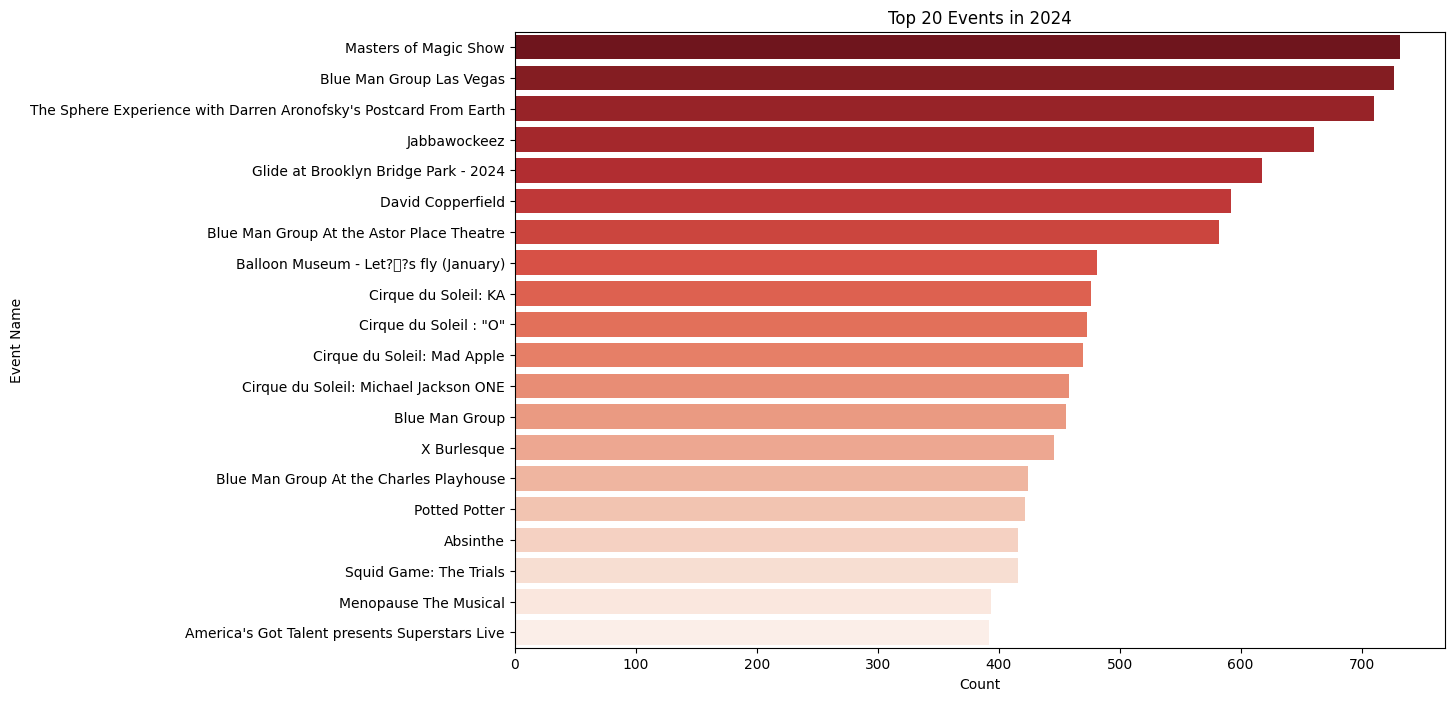

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_20_events_df = top_20_events_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Event Name', data=top_20_events_df, palette='Reds_r')
plt.title('Top 20 Events in 2024')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.show()

In [ ]:
top_20_events_df[['Min Price', 'Max Price']] = top_20_events_df[['Min Price', 'Max Price']].apply(pd.to_numeric, errors='coerce')

top_20_events_df[['Min Price', 'Max Price']] = top_20_events_df[['Min Price', 'Max Price']].fillna(0)
top_20_events_df['Average Price'] = (top_20_events_df['Min Price'] + top_20_events_df['Max Price']) / 2

sorted_events_df = top_20_events_df.sort_values(by='Average Price', ascending=False)

In [ ]:
sorted_events_df['Start Date'] = pd.to_datetime(sorted_events_df['Start Date'])

earliest_start_dates = sorted_events_df.groupby('Event Name')['Start Date'].min().reset_index()
earliest_data = pd.merge(earliest_start_dates, sorted_events_df, on=['Event Name', 'Start Date'], how='inner')

# Create an interactive scatter plot using plotly
scatter_plot = go.Figure()

for event_name in earliest_data['Event Name'].unique():
    data_subset = earliest_data[earliest_data['Event Name'] == event_name]
    scatter_plot.add_trace(
        go.Scatter(
            x=data_subset['Count'],
            y=data_subset['Average Price'],
            mode='markers',
            marker=dict(size=10),
            name=event_name
        )
    )

scatter_plot.update_layout(
    title='Relationship Between Event Frequency and Average Ticket Prices',
    xaxis_title='Count',
    yaxis_title='Average Price',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

scatter_plot.show()

In [ ]:
average_prices = filtered_df.groupby(['EVENT_START_LOCAL_DATE', 'EVENT_NAME']).agg({'MIN_PRICE': 'mean'}).reset_index()
average_prices['EVENT_START_LOCAL_DATE'] = pd.to_datetime(average_prices['EVENT_START_LOCAL_DATE'])

fig = px.line(
    average_prices,
    x='EVENT_START_LOCAL_DATE',
    y='MIN_PRICE',
    color='EVENT_NAME',
    markers=True,
    title='Average Price Changes Over Time for Top 5 Events'
)

fig.update_layout(
    xaxis_title='Event Start Date',
    yaxis_title='Average Minimum Price',
    xaxis=dict(tickangle=45)
)

fig.show()